<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_5%EC%B0%A8%EC%8B%9C_%EB%8B%A4%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 분류를 위한 다층 신경망 구현
  
 [1] 분류문제 신경망 구현  
  - 입력층 노드 : 2개  
  - 은닉층 노드 : 2개  
  - 출력층 노드 : 2개  
  - 은닉층 활성화 함수 : 시그모이드  
  - 출력층 활성화 함수 : 소프트맥스  
    
 - 분류를 위한 다층 신경망을 구헝할 경우, 마지막 출력의 활성화 함수는 교차 엔트로피를 사용  

## 2. 역전파의 개념  

[1] 역전파  
 - 순전파 : 입력값과 가중치곱의 합을 활성화 함수를 이용해 출력  
 - 역전파  
  + 신경망을 학습시키는 알고리즘  
  + 출력값과 정답의 오차의 계산  
  + 네트워크를 거슬러 올라가면서 이 오차를 이용하여 각 가중치와 편향을 최적화  

[2] 역전파 방법  
 1단계 : 순전파로 얻은 출력값과 정답과의 오차를 계산  
 => 2단계 : 각 층을 거슬러 올라가면서 이 오차를 역방향으로 전파  
 => 3단계 : 각 층에서는 전파된 오차를 이용하여 가중치와 편향의 수정량을 계산  
 => 4단계 : 모든 층의 가중치와 편향을 조금씩 수정  
 => 위 과정을 반복하여 네트워크를 최적화 : "학습"  

 [3] 역전파를 위한 학습  
   - 훈련 데이터, 테스트 데이터  
   - 오차함수 또는 손실함수  
   - 경사하강법  
   - 최적화 알고리즘  


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

In [20]:
w_im = np.array([[1.0, 2.0], [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]])

In [21]:
b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])

In [22]:
def middle_layer(x, w, b):
  u = np.dot(x, w) + b
  return 1 / (1 + np.exp(-u)) # 시그모이드 함수

In [23]:
def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return np.exp(u) / np.sum(np.exp(u)) # 소프트맥스 함수

In [24]:
x_1 = []
y_1 = []
x_2 = []
y_2 = []

In [25]:
for i in range(20):
  for j in range(20):
    inp = np.array([X[i], Y[j]]) # 입력
    mid = middle_layer(inp, w_im, b_im) # 은닉
    out = output_layer(mid, w_mo, b_mo) # 출력

    if out[0] > out[1]:
      x_1.append(X[i])
      y_1.append(Y[j])
    else:
      x_2.append(X[i])
      y_2.append(Y[j])

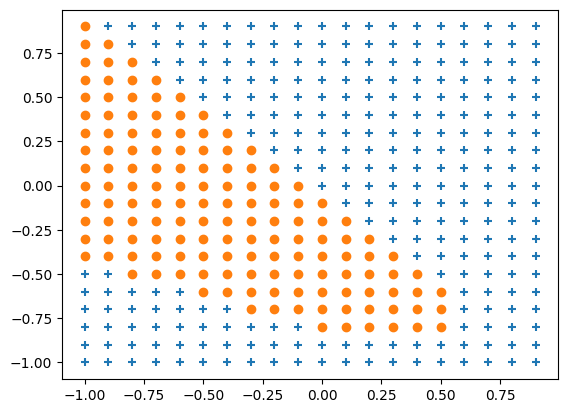

In [26]:
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()

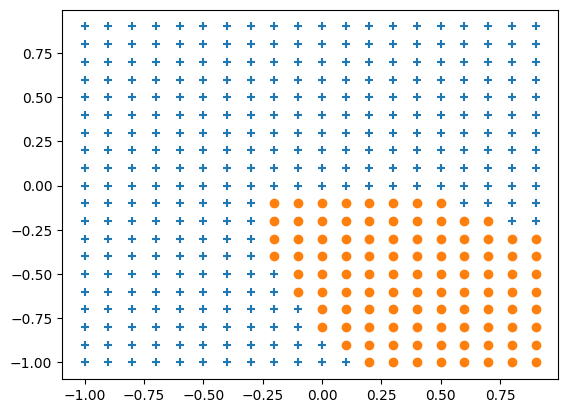

In [27]:
# 가중치 값 수정하기
w_im = np.array([[2.0, 2.0], [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]])
b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])
x_1 = []
y_1 = []
x_2 = []
y_2 = []
for i in range(20):
  for j in range(20):
    inp = np.array([X[i], Y[j]]) # 입력
    mid = middle_layer(inp, w_im, b_im) # 은닉
    out = output_layer(mid, w_mo, b_mo) # 출력

    if out[0] > out[1]:
      x_1.append(X[i])
      y_1.append(Y[j])
    else:
      x_2.append(X[i])
      y_2.append(Y[j])
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()